<a href="https://colab.research.google.com/github/AndresCMontejo/Analisis_Exploratorio_Datos/blob/main/Graficos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Estadísticas univariantes:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Correlación entre v

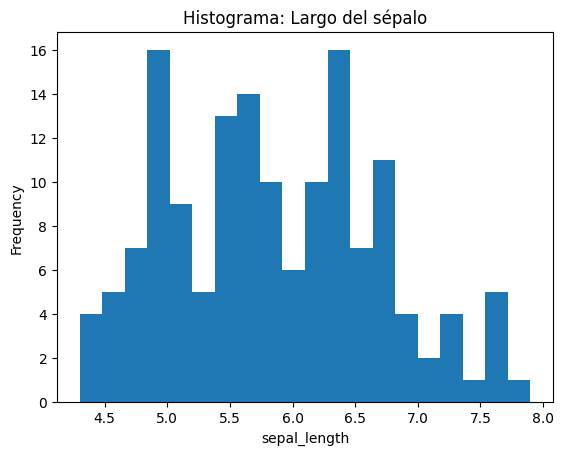

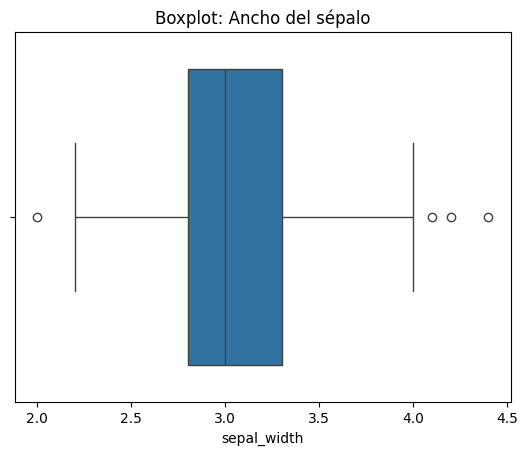

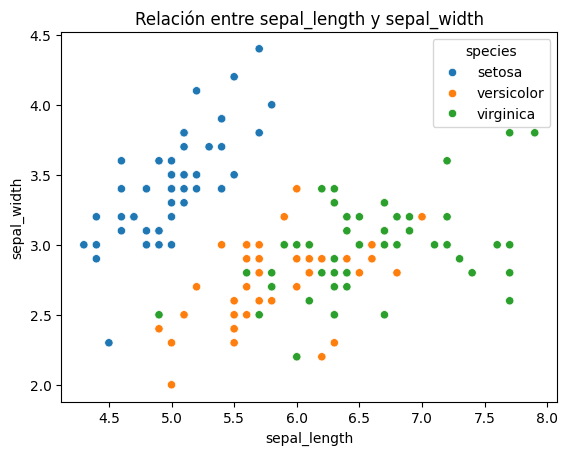

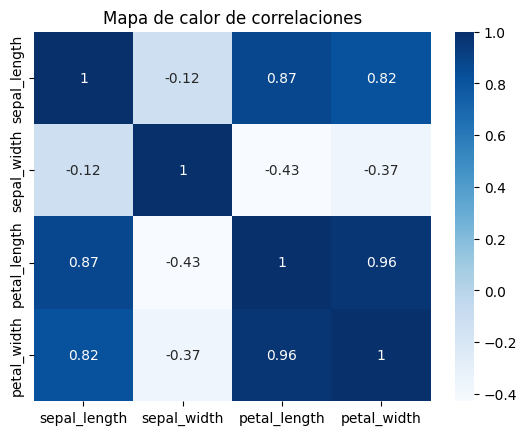

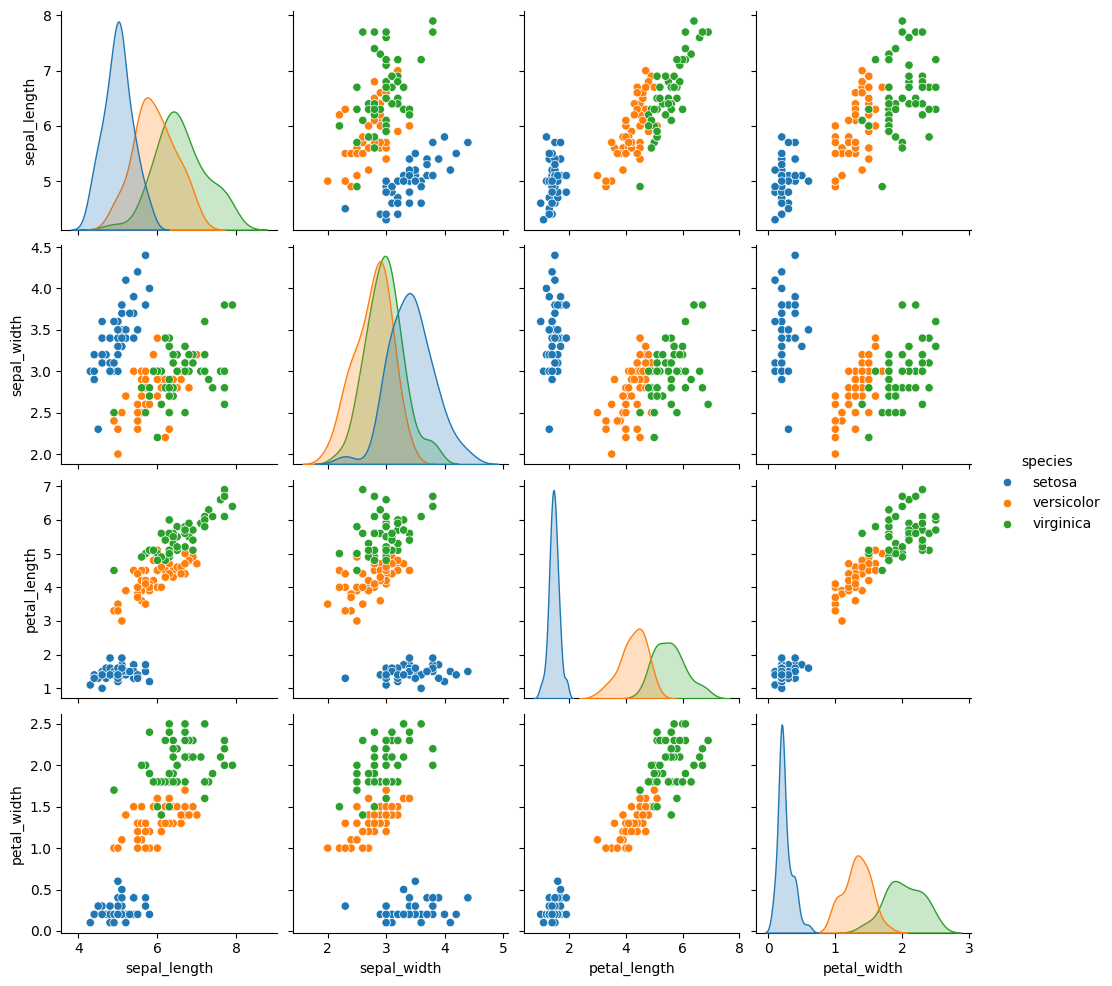


EDA completado. Gráficos guardados en el directorio de ejecución.


In [1]:
#Ejemplo del analisis exploratorio de Datos (EDA) en Python

#Importar nuestras librerias
import pandas as pd                #Tablas de datos
import seaborn as sns              #Graficos estadisticos y datasets de ejemplo
import matplotlib.pyplot as plt    #Guardar figuras

# 1.- Cargar el dataset Iris
#Se carga el dataset Iris de ejemplo, que contiene médidas de flores y especie.
df = sns.load_dataset("iris")
#Imprime texto guia
print("Primeras filas del dataset:")
#Muestra las primeras 5 filas del dataframe para una inspección rapida de los datos
print(df.head())

#Proporciona media, desviación estandar, rangos, etc, para variables numéricas
print("\nEstadísticas univariantes:")
#Calcula estadisticas descriptivas (count, mean, std, cuartiles, max) de columnas
print(df.describe())

#Crea una nueva figura para que el siguiente grafico no se mezcle con otros.
plt.figure()

#Muestra como se destribuye el largo del sépalo
#bins=20 indica cuantas barras tendrá el histograma
#Dibuja un histograma de "sepal_length" con 20 bins y un titulo
df["sepal_length"].plot(kind="hist", bins=20, title="Histograma: Largo del sépalo")
#Define la etiqueta del eje X del gráfico actual.
plt.xlabel("sepal_length")
#Guardamos la figura actual en un archivo png en el directorio de ejecución
plt.savefig("histograma_sepal_length.png")

#BoxPLOT
#Crea una figura para que el siguiente grafico no se mezcle con otros.
plt.figure()
# Permite detectar outliers y ver la distribucipon del ancho del sépalo.
# Basicamente crea un boxplot de "sepal_width" para ver la dispersión y posible "outliers"
sns.boxplot(data=df, x="sepal_width")
# Define el titulo del grafico actual
plt.title("Boxplot: Ancho del sépalo")
plt.savefig("boxplot_sepal_width.png")
plt.figure()

# 3.- EDA Bivariable
# Scatterplot
# Crea una figura para que el siguiente grafico no se mezcla con otros.
# Relaciona dos variables
# Colorea los puntos por especie para ver patrones entre categorias.
# Crea un scatterplot sepal_with y colorea los puntos por especie
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
#Definimos el titulo del grafico actual
plt.title("Relación entre sepal_length y sepal_width")
#Guardamos la figura actual en un archivo png en el directorio de ejecución
plt.savefig("scatterplot_sepal.png")
# Correlación
print("\nCorrelación entre variables numéricas:")
# Calcula que tan relacionadas estan las variables numericas
# Calcula la matriz de correlación de columnas (numeric_only=true)
print(df.corr(numeric_only=True))

#Crea una figura para que el siguiente grafico no se mezcle con otros
plt.figure()
# Visualiza la matriz de correlación
# annot= True muestra los valores dentro de cada cuadro
# Calcul la matriz de correlacion de columnas numericas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Mapa de calor de correlaciones")
plt.savefig("heatmap_correlaciones.png")

# PairPlot
# Muestra todos los pares visibles en graficos scatter y distribuciones
# Muy util para observar como se separan las especies.
sns.pairplot(df, hue="species")
# Guarda la figura actual en el archivo en png
plt.savefig("pairplot_iris.png")

print("\nMedia de variables por especie:")
print(df.groupby("species").mean())
plt.show()
print("\nEDA completado. Gráficos guardados en el directorio de ejecución.")

In [2]:
!pip install squarify

TABLA DE VENTAS POR REGIÓN Y CATEGORÍA
  region  categoria_A  categoria_B  categoria_C
0  Norte          100           50           30
1    Sur           80           60           40
2   Este           60           70           50
3  Oeste           40           80           60


/tmp/ipython-input-3058639264.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range("2024-01-01", periods=6, freq="M")


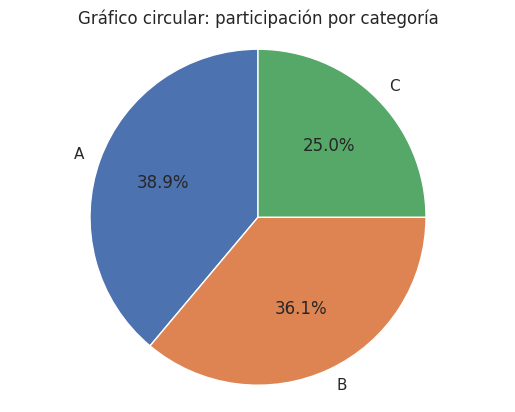

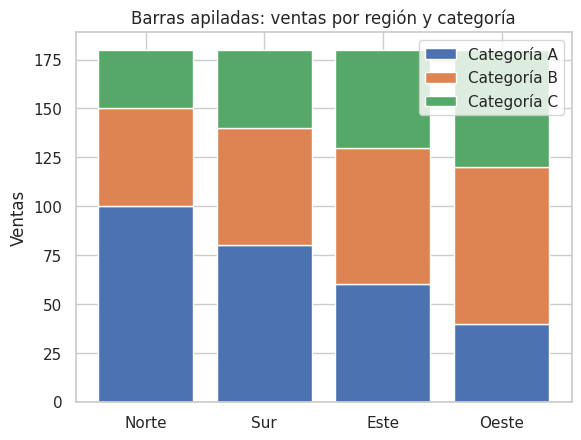

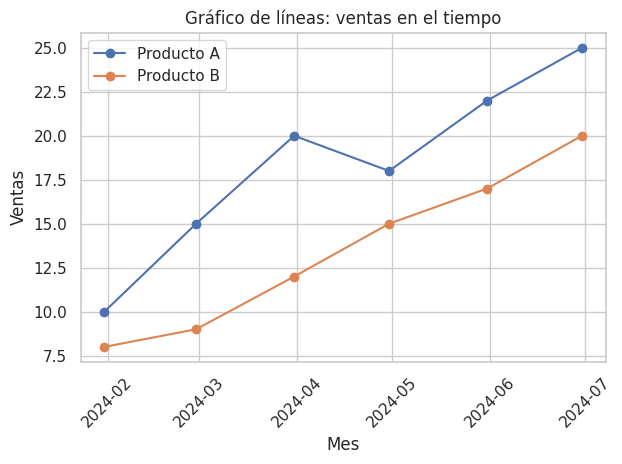

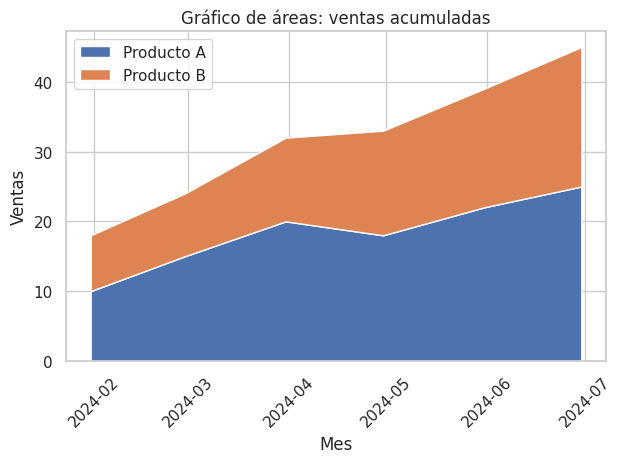

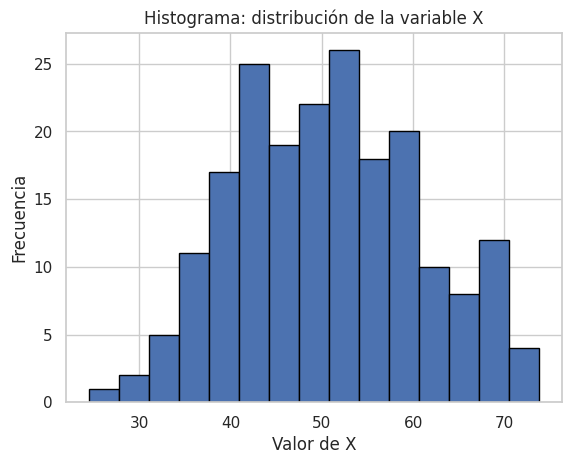

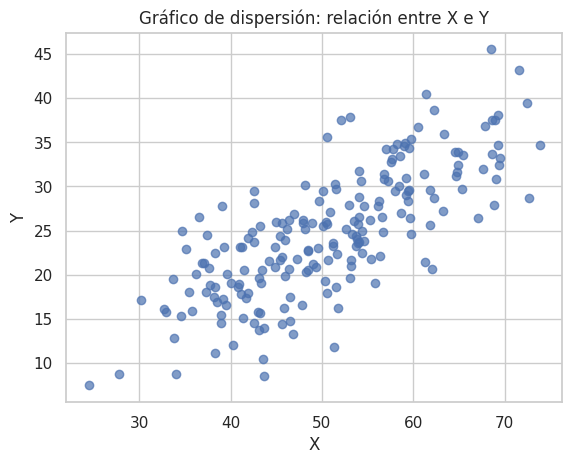

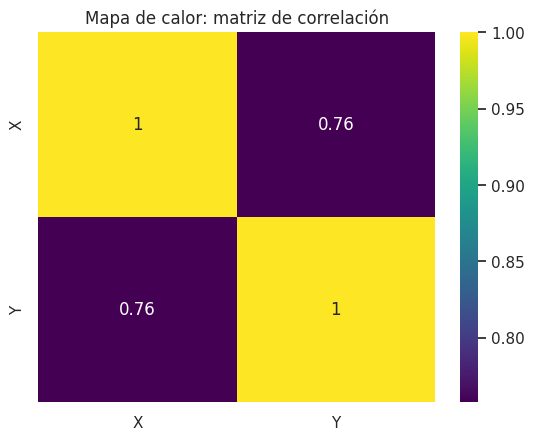

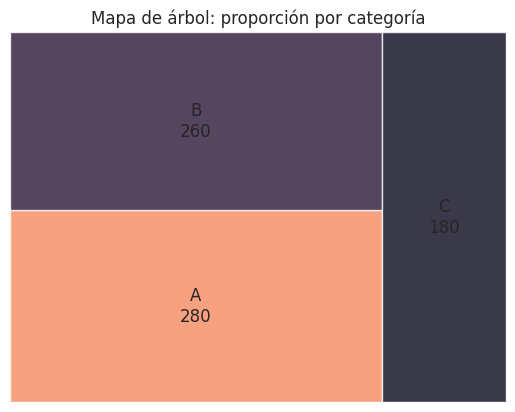

In [4]:
# Importar las librerias
import pandas as pd   #Manipulación de datos
import numpy as np    #Simularemos variables continuas con ruido
import matplotlib.pyplot as plt #Crear graficos
import seaborn as sns #Crear graficos estadisctos
import squarify   #Mapa de árbol

sns.set(style="whitegrid")
#Se crea una tabla con ventas por región por categorias (A,B,C).
datos = {
    "region": ["Norte", "Sur", "Este", "Oeste"],
    "categoria_A": [100, 80, 60, 40],
    "categoria_B": [50, 60, 70, 80],
    "categoria_C": [30, 40, 50, 60],
}
df = pd.DataFrame(datos)

# Se crea una tabla con ventas de dos productos a los largo de 6 meses
meses = pd.date_range("2024-01-01", periods=6, freq="M")
ventas_tiempo = pd.DataFrame({
    "mes": meses,
    "producto_A": [10, 15, 20, 18, 22, 25],
    "producto_B": [8, 9, 12, 15, 17, 20]
})

np.random.seed(0)
x = np.random.normal(50, 10, 200)
y = x * 0.5 + np.random.normal(0, 5, 200)

print("TABLA DE VENTAS POR REGIÓN Y CATEGORÍA")
print(df)

totales_categoria = {
    "A": df["categoria_A"].sum(),
    "B": df["categoria_B"].sum(),
    "C": df["categoria_C"].sum(),
}

plt.figure()
plt.title("Gráfico circular: participación por categoría")


plt.pie(totales_categoria.values(),
        labels=totales_categoria.keys(),
        autopct="%1.1f%%",
        startangle=90)
plt.axis("equal")
plt.show()

plt.figure()
plt.title("Barras apiladas: ventas por región y categoría")
plt.bar(df["region"], df["categoria_A"], label="Categoría A")
plt.bar(df["region"], df["categoria_B"], bottom=df["categoria_A"], label="Categoría B")

plt.bar(df["region"], df["categoria_C"],
        bottom=df["categoria_A"] + df["categoria_B"], label="Categoría C")
plt.ylabel("Ventas")
plt.legend()
plt.show()

plt.figure()
plt.plot(ventas_tiempo["mes"], ventas_tiempo["producto_A"], marker="o", label="Producto A")
plt.plot(ventas_tiempo["mes"], ventas_tiempo["producto_B"], marker="o", label="Producto B")
plt.title("Gráfico de líneas: ventas en el tiempo")
plt.xlabel("Mes"); plt.ylabel("Ventas")
plt.legend(); plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.stackplot(
    ventas_tiempo["mes"],
    ventas_tiempo["producto_A"],
    ventas_tiempo["producto_B"],
    labels=["Producto A", "Producto B"]
)
plt.title("Gráfico de áreas: ventas acumuladas")
plt.xlabel("Mes"); plt.ylabel("Ventas")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.title("Histograma: distribución de la variable X")
plt.hist(x, bins=15, edgecolor="black")
plt.xlabel("Valor de X"); plt.ylabel("Frecuencia")
plt.show()

plt.figure()
plt.title("Gráfico de dispersión: relación entre X e Y")
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

df_xy = pd.DataFrame({"X": x, "Y": y})
corr = df_xy.corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Mapa de calor: matriz de correlación")
plt.show()

sizes = list(totales_categoria.values())
labels = [f"{cat}\n{val}" for cat, val in totales_categoria.items()]

plt.figure()
plt.title("Mapa de árbol: proporción por categoría")
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis("off")
plt.show()

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression


def ejemplo_descriptiva():
    np.random.seed(0)
    datos = pd.DataFrame({
        "hora": np.random.randint(0, 24, 100_000),
    })

    conteo_por_hora = datos["hora"].value_counts().sort_index()
    print("\n=== INTERPRETACIÓN DESCRIPTIVA ===")
    print("Vehículos detectados por hora:")
    print(conteo_por_hora)


def ejemplo_inferencial():
    np.random.seed(1)
    muestra = pd.DataFrame({
        "tiempo_uso_min": np.random.normal(80, 20, 5000)
    })

    media_muestra = muestra["tiempo_uso_min"].mean()
    print("\n=== INTERPRETACIÓN INFERENCIAL ===")
    print(f"Tiempo promedio estimado en toda la población: {media_muestra:.2f} min/día")

def ejemplo_comparativa():
    np.random.seed(2)
    trafico = pd.DataFrame({
        "evento": ["normal"] * 100_000 + ["black_friday"] * 100_000,
        "peticiones": np.concatenate([
            np.random.poisson(300, 100_000),   # día normal
            np.random.poisson(900, 100_000),   # Black Friday
        ])
    })

    comparacion = trafico.groupby("evento")["peticiones"].mean()
    print("\n=== INTERPRETACIÓN COMPARATIVA ===")
    print("Peticiones promedio por evento:")
    print(comparacion)

def ejemplo_causal():
    np.random.seed(3)
    n = 200_000
    version = np.array(["v1"] * (n // 2) + ["v2"] * (n // 2))
    clicks_v1 = np.random.poisson(2, n // 2)
    clicks_v2 = np.random.poisson(4, n // 2)

    datos_algoritmo = pd.DataFrame({
        "version_algoritmo": version,
        "clicks": np.concatenate([clicks_v1, clicks_v2])
    })

    resultado = datos_algoritmo.groupby("version_algoritmo")["clicks"].mean()
    print("\n=== INTERPRETACIÓN CAUSAL (SIMULADA) ===")
    print("Clicks promedio por versión de algoritmo:")
    print(resultado)
    print("Interpretación: la versión v2 parece incrementar los clics promedio.")


def ejemplo_predictiva():
    np.random.seed(4)
    temperatura = np.random.uniform(5, 35, 1000)
    demanda = 200 + temperatura * 8 + np.random.normal(0, 10, 1000)

    X = temperatura.reshape(-1, 1)
    y = demanda

    modelo = LinearRegression()
    modelo.fit(X, y)

    temp_objetivo = 30
    demanda_predicha = modelo.predict([[temp_objetivo]])[0]

    print("\n=== INTERPRETACIÓN PREDICTIVA ===")
    print(f"Demanda energética estimada si la temperatura es {temp_objetivo}°C:")
    print(f"{demanda_predicha:.2f} unidades (simulado)")


def ejemplo_prescriptiva():
    distancias = np.array([5, 12, 8, 3, 10])
    tiempos_trafico = np.array([1.2, 1.5, 1.3, 1.0, 1.4])

    puntuacion = distancias * tiempos_trafico
    ruta_optima = puntuacion.argmin()

    print("\n=== INTERPRETACIÓN PRESCRIPTIVA ===")
    print("Puntuación de cada ruta (distancia * tráfico):")
    for i, p in enumerate(puntuacion):
        print(f"Ruta {i}: {p:.2f}")
    print(f"\nLa mejor ruta sugerida es la número: {ruta_optima} (índice base 0).")

if __name__ == "__main__":
    ejemplo_descriptiva()
    ejemplo_inferencial()
    ejemplo_comparativa()
    ejemplo_causal()
    ejemplo_predictiva()
    ejemplo_prescriptiva()


=== INTERPRETACIÓN DESCRIPTIVA ===
Vehículos detectados por hora:
hora
0     4108
1     4175
2     4068
3     4259
4     4273
5     4198
6     4237
7     4070
8     4114
9     4168
10    4172
11    4284
12    4240
13    4170
14    4088
15    4163
16    4169
17    4203
18    4186
19    4154
20    4234
21    4087
22    4062
23    4118
Name: count, dtype: int64

=== INTERPRETACIÓN INFERENCIAL ===
Tiempo promedio estimado en toda la población: 80.49 min/día

=== INTERPRETACIÓN COMPARATIVA ===
Peticiones promedio por evento:
evento
black_friday    899.91417
normal          299.93212
Name: peticiones, dtype: float64

=== INTERPRETACIÓN CAUSAL (SIMULADA) ===
Clicks promedio por versión de algoritmo:
version_algoritmo
v1    1.99786
v2    4.00908
Name: clicks, dtype: float64
Interpretación: la versión v2 parece incrementar los clics promedio.

=== INTERPRETACIÓN PREDICTIVA ===
Demanda energética estimada si la temperatura es 30°C:
440.21 unidades (simulado)

=== INTERPRETACIÓN PRESCRIPTIVA ===